In [1]:
import numpy as np
from math import factorial
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def kraft_posterior(S, N, B):
    cn = 0
    for n in np.arange(0,N+1):
        cn += (np.exp(-B) * B**n)/factorial(n)
    C = cn**-1
    return C * (np.exp(- S - B) * (S + B)**N) / factorial(N)


def kraft_posterior_root(S, N, B, Y):
    return abs(kraft_posterior(S, N, B) - Y)


def kraft_posterior_prob(Y, N, B):
    lolim = minimize(kraft_posterior_root, N-B-1, args=(N,B,Y),method='Nelder-Mead')['x'][0]
    if lolim < 0.0:
        lolim = 0.0
    uplim = minimize(kraft_posterior_root, N+B+1, args=(N,B,Y),method='Nelder-Mead')['x'][0]
    if uplim < 0.0:
        uplim = 0.0
    return lolim, uplim, quad(kraft_posterior, lolim, uplim, args=(N,B))[0]


def kraft_post_prob_root(Y, N, B, cl):
    return abs(kraft_posterior_prob(Y, N, B)[2] - cl)


def kraft(N, B, cl):
    starting_point = 0.5*kraft_posterior(N-B, N, B)
    return kraft_posterior_prob(minimize(kraft_post_prob_root, starting_point, (N, B, cl), method='Nelder-Mead')['x'], N, B)

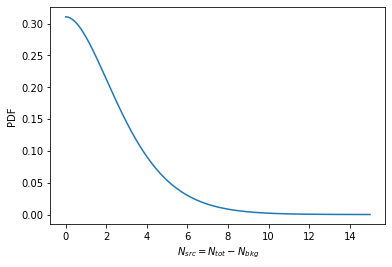

In [17]:
x = np.linspace(0,15,1000)
y = kraft_posterior(x, 4, 4)
plt.plot(x,y)
plt.xlabel(r'$N_{src} = N_{tot} - N_{bkg}$')
plt.ylabel('PDF')
plt.savefig('kraft.png')

In [9]:
quad(kraft_posterior, 0, 6, args=(4,4))

(0.9534812819660579, 1.0585768727878285e-14)